# 8. alkalom: Modulok és csomagok. Ismerkedés a numpy és a matplotlib csomag lehetőségeivel

## Modulok és Csomagok néhány példával
**Modul**: Python nyelvű fájl. [Modulok a dokumentációban](https://docs.python.org/3/tutorial/modules.html)
- Definíciókat és utasításokat tartalmaz.
- Ha a modulhoz az `xyz.py` fájl tartozik, akkor a modulra `xyz` néven lehet hivatkozni.
- A modulok más Python programokból importálhatók.

**Csomag**: Modulok gyűjteménye.  [Csomagok a dokumentációban](https://docs.python.org/3/tutorial/modules.html#packages)
- Egy csomag alcsomagokat/almodulokat is tartalmazhat. A hierarchiát a csomagon belüli könyvtárszerkezet határozza meg.
- A standard csomagok és modulok a standard könyvtárban találhatók, és nem igényelnek telepítést.
- A külső csomagok gyűjtőhelye a PyPI (https://pypi.python.org/pypi).

### Modul vagy csomag importálása, majd abból a szükséges függvény meghívása

In [1]:
# Modul/csomag importálása.
import random

In [2]:
# A random egészet sorsoló függvény meghívása 
random.randint(1, 100)

75

In [8]:
# de egy listából is vehetünk ki véletlenszerűen elemet
l = ["alma", "körte","szilva","málna"]
random.choice(l)

'málna'

### Csak a szükséges függvények importálása egy modulból/csomagból.

In [8]:
# Egyetlen függvény importálása egy modulból/csomagból.
from random import randint

In [9]:
randint(10, 20)

14

In [9]:
# Függvény importálása almodulból/alcsomagból.
from os.path import dirname

In [10]:
dirname('/tmp/pistike/a.txt')

'/tmp/pistike'

### Modul/csomag teljes tartalmának importálása 
**Megjegyzés:** Ez a megoldás általában kerülendő. Keveredhetnek a függvény nevek. 

In [ ]:
# from random import *

### Modul vagy csomag importálása rövid néven

In [10]:
# rövidítve 
import random as rd

In [11]:
rd.randint(0,10)

1

## Megjegyzés: listák másolásáról
 - [Másolás - copy csomag a dokumentációban ](https://docs.python.org/3/library/copy.html)
- Sekély (shallow) és mély (deep) másoló függvényt tartalmaz.

In [12]:
import copy as cp

a = b értékadás számokkal

In [13]:
a = 2
b = a
print("a = ", a, ";\tb = ", b)
a = 3
print("a = ", a, ";\tb = ", b)

a =  2 ;	b =  2
a =  3 ;	b =  2


a = b értékadás listákkal 
- NEM végez másolást
- csak hívatkozást hoz létre

In [14]:
# Pythonban az értékadás NEM végez másolást, csak hivatkozást hoz létre.
a = [1, 2, 3]
b = a
print("a = ", a, ";\tb = ", b)
b[0] = 2
print("a = ", a, ";\tb = ", b)

a =  [1, 2, 3] ;	b =  [1, 2, 3]
a =  [2, 2, 3] ;	b =  [2, 2, 3]


Ha független másolatot szeretnénk ahhoz kell a copy csomag

In [15]:
# Sekély másolat készítése.
a = [1, 2, 3]
b = cp.copy(a)
print("a = ", a, ";\tb = ", b)
b[0] = 2
a[-1] =10
print("a = ", a, ";\tb = ", b)

a =  [1, 2, 3] ;	b =  [1, 2, 3]
a =  [1, 2, 10] ;	b =  [2, 2, 3]


In [19]:
# Sekély másolat készítése egy listák listája objektumról.
a = [[1], [2], [2]]
b = cp.copy(a)
print("a = ", a, ";\tb = ", b)

a =  [[1], [2], [2]] ;	b =  [[1], [2], [2]]


In [20]:
# A cp.copy() csak az adatszerkezet legfelső szintjén végez másolást.
b[0][0] = 10
print("a = ", a, ";\tb = ", b)

a =  [[10], [2], [2]] ;	b =  [[10], [2], [2]]


In [21]:
# Mély másolat készítése egy listák listája objektumról.
a = [[1], [2], [3]]
b = cp.deepcopy(a)
b[0][0] = 10
print("a = ", a, ";\tb = ", b)

a =  [[1], [2], [3]] ;	b =  [[10], [2], [3]]


## NumPy csomag

A [NumPy](http://www.numpy.org/) egy alacsony szintű matematikai csomag, numerikus számításokhoz.

- Alapvető adatszerkezete az [n dimenziós tömb](https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html).  Így praktikus vektorokkal való számolásoknál. 
- C nyelven íródott. A szokásos tömbműveletek hatékonyan vannak benne megvalósítva.
- Többek között tartalmaz lineáris algebrai és véletlenszám generáló almodult.
- Számos magasabb szintű csomag (pl. scipy, matplotlib, pandas, scikit-learn) épül rá.

A NumPy külső csomag. A Colab felületén ez is elérhető. 

De a saját gépünkön szükség van telepítésére. Többféle lehetőség van, például:
- `pip install numpy --user`
- `sudo apt-get install python3-numpy`
- `conda install numpy`

In [22]:
# A NumPy modul importálása np néven.
import numpy as np

In [23]:
# Verzió lekérdezése.
np.__version__

'1.23.4'

### Állandók és függvények

In [24]:
# Megvan a pi és az e állandó sok tizedes jegyre:  
np.pi, np.e

(3.141592653589793, 2.718281828459045)

In [25]:
# cos(x) sin(x) trigonometrikus függvények
np.cos(np.pi/4)

0.7071067811865476

In [26]:
# sqrt(x) gyökvonás    
np.sqrt(3)

1.7320508075688772

In [27]:
# Van beépített függvény legnagyobb közös osztóra
# greatest common divisor --> gcd() 

np.gcd(60,18)

6

In [36]:
print(np.gcd.__doc__)

gcd(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Returns the greatest common divisor of ``|x1|`` and ``|x2|``

Parameters
----------
x1, x2 : array_like, int
    Arrays of values.
    If ``x1.shape != x2.shape``, they must be broadcastable to a common
    shape (which becomes the shape of the output).

Returns
-------
y : ndarray or scalar
    The greatest common divisor of the absolute value of the inputs
    This is a scalar if both `x1` and `x2` are scalars.

See Also
--------
lcm : The lowest common multiple

Examples
--------
>>> np.gcd(12, 20)
4
>>> np.gcd.reduce([15, 25, 35])
5
>>> np.gcd(np.arange(6), 20)
array([20,  1,  2,  1,  4,  5])


### Tömbök létrehozása

#### Példa: egész számokból álló tömb létrehozása

In [83]:
# egész számokból álló 1x3 tömb - SORVEKTOR
a = np.array([2, 3, 4])

In [84]:
print(a)

[2 3 4]


In [85]:
# A tömb objektum típusa.
type(a)

numpy.ndarray

In [86]:
# a tömb elemei módosíthatóak
a[2] = 5
print(a)

[2 3 5]


#### Tömb jellemzők lekérdezése

In [56]:
# Hány dimenziós a tömb?
a.ndim

1

In [65]:
# A tömb alakja/mérete.
a.shape

(3,)

In [66]:
len(a)

3

In [59]:
# összes elem 
a.size

3

In [60]:
# Az elemek típusának lekérdezése.
# A NumPy tömbök homogének, azaz egyféle adatok vannak benne
a.dtype

dtype('int64')

**Feladat**: Hozzunk létre egy 2 x 3-as tömböt, valós számokkal

Kérdezzük le a dimenziók számát, a tömb méretét, az elemek számát, az elemek típusát!


In [61]:
# Hozzunk létre egy 2 x 3-as tömböt, valós számokkal
b = np.array( [ [ 0.1, 0.2  , 4.5 ],
                [4.44, 5.12 , np.pi]  ]  )

In [62]:
print(b)

[[0.1        0.2        4.5       ]
 [4.44       5.12       3.14159265]]


In [64]:
# Dimenziók száma, mérete, az elemek típusa.
b.ndim, b.size, b.shape, len(b), b.dtype

(2, 6, (2, 3), 2, dtype('float64'))

#### További módszerek tömb létrehozásra
`genfromtxt()`; `zeros()`; `ones()`; `arange()`; `concatenate()`

In [50]:
# készítsünk  egy "matrix.txt" nevű fájlt 2 sorban 3 egész szám szóközzel elválasztva
# majd olvassuk be a txt fájlt tömbként
np.genfromtxt('matrix.txt')

array([[1., 0., 1.],
       [1., 1., 0.]])

In [51]:
# Nullákból álló tömb létrehozása 1dimenziós
np.zeros(7)

array([0., 0., 0., 0., 0., 0., 0.])

In [67]:
# Nullákból álló tömb létrehozása többdimenziós
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [69]:
# Egyesekből álló tömb létrehozása
np.ones((5, 1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [54]:
# Értéktartomány létrehozása a lépésköz megadásával.
np.arange(-5, 5, 0.5)

array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
        0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

In [55]:
# Vektorok összefűzése.
a = np.array([2, 3])
b = np.array([44, 55, 66])
np.concatenate([a, b])

array([ 2,  3, 44, 55, 66])

### Másolás beépítve

In [70]:
a = np.array([1,2,3])
b = a.copy()
print("a = ", a, ";\tb = ", b)
b [0] = 10
print("a = ", a, ";\tb = ", b)

a =  [1 2 3] ;	b =  [1 2 3]
a =  [1 2 3] ;	b =  [10  2  3]


### Elemek és résztömbök

In [88]:
# Hozzunk létre egy példamátrixot!
a = np.array([[3, 4, 5],
              [6, 7, 8]])

In [89]:
# Elem kiválasztása (az indexelés 0-tól indul).
print("2. sor 3. eleme: ", a[1, 2])    # 1 a sorindex, 2 az oszlopindex

2. sor 3. eleme 8


In [94]:
print("1. sor 2. eleme: ", a[0, 1])

1. sor 2. eleme:  4


In [95]:
# Teljes sor kiválasztása.
a[1,  ]

array([6, 7, 8])

In [96]:
# Így is lehetne.
a[1]

array([6, 7, 8])

In [97]:
# Oszlop kiválasztása.
a[:, 1]

array([4, 7])

In [98]:
# Adott indexű oszlopok kiválasztása.
a[:, [0, 2]]

array([[3, 5],
       [6, 8]])

In [99]:
# Elemek kiválasztása logikai feltétel alapján.
a[a % 2 == 0]     # páros elemek kiválasztása

array([4, 6, 8])

In [100]:
a % 2 == 0

array([[False,  True, False],
       [ True, False,  True]])

In [101]:
a[a > 5]

array([6, 7, 8])

In [104]:
# A tömb elemei módosíthatóak.
a[0, -1] = 100
a

array([[  3,   4, 100],
       [  6,   7,   8]])

In [75]:
a[:, -1]

array([100,   8])

In [76]:
# Oszlop módosítása.
a[:, -1] = 40, 70
a

array([[100,   4,  40],
       [  6,   7,  70]])

### Vektor műveletek (Tömbműveletek) Koordinátánként

In [77]:
# Hozzunk létre 2 példatömböt!
a = np.array([1, 7 ,3])
b = np.array([1, 1, 1])

In [78]:
# Elemenkénti összeadás.
a + b

array([2, 8, 4])

In [79]:
# Elemenkénti kivonás.
a - b

array([0, 6, 2])

In [80]:
# számmal szorzás 
2 * a

array([ 2, 14,  6])

In [82]:
# Elemenkénti szorzás.
print(a,b)
a*b

[1 7 3] [1 1 1]


array([1, 7, 3])

In [83]:
# Elemenkénti osztás. 
a/b

array([1., 7., 3.])

In [85]:
# Elemenkénti egészosztás.
b//a

array([1, 0, 0])

In [86]:
# Elemenkénti hatványozás.
a**2

array([ 1, 49,  9])

In [87]:
# A művelet nem feltétlenül végezhető el.
c = np.array([2, 3, 4]) # 3 hosszú tömb
d = np.array([10, 20])  # 2 hosszú tömb
c + d

ValueError: ignored

In [ ]:
# Két vektor skaláris szorzata.
a = np.array([3, 4, 5])
b = np.array([2, 2, 2])
a @ b

### Függvények és tömbök

In [105]:
# Hozzunk létre egy példamátrixot!
a = np.array([[3, 4, 5],
              [6, 7, 8]])

In [106]:
# Elemenkénti függvények (exp, log, sin, cos, ...).
np.cos(a) # koszinusz

array([[-0.9899925 , -0.65364362,  0.28366219],
       [ 0.96017029,  0.75390225, -0.14550003]])

In [107]:
np.log(a) # természetes alapú logaritmus

array([[1.09861229, 1.38629436, 1.60943791],
       [1.79175947, 1.94591015, 2.07944154]])

In [108]:
# álltalunk megadott függvény is alkalmazható array-re:
def f(x):
    return (x-2)**2
print(f(0.5))
print(f(a))

2.25
[[ 1  4  9]
 [16 25 36]]


### Statisztikai műveletek (min, max, sum, mean, std).


In [109]:
# Hozzunk létre egy példamátrixot!
a = np.array([[3, 4, 5],
              [6, 7, 8]])

In [110]:
a.sum()

33

In [111]:
a.min(), a.max()

(3, 8)

In [112]:
a.mean()

5.5

In [113]:
# minimum és maximum hely (argmin,argmax)
a.argmax()

5

### Keresés - np.where()

In [101]:
# Példa: Mely indexeknél találhatók az 5-nél kisebb elemek?
a = np.array([3, 10, 11, 4, 7, 8])

print(a[a<5])
np.where(a<5)

[3 4]


(array([0, 3]),)

### Rendezés

In [118]:
# Rendezés helyben.
a = np.array([3, 10, 11, 4, 7, 8])
a.sort()

In [119]:
print(a)

[ 3  4  7  8 10 11]


In [121]:
# Rendezés új tömbbe.
a = np.array([3, 10, 11, 4, 7, 8])
np.sort(a)

array([ 3,  4,  7,  8, 10, 11])

In [122]:
# Rendezés csökkenő sorrendbe.
np.sort(a)[::-1]

array([11, 10,  8,  7,  4,  3])

## [Matplotlib](https://matplotlib.org/)

A Matplotlib adatok ábrázolásához hasznos csomag.

- Nyomdai minőségben testreszabható grafikon rajzolás
- Sokféle képfájlként kimenthető eredmény
- De animációt is lehet vele készíteni

A Matplotlib is külső csomag. A Colab felületén ez is elérhető. 

De a saját gépünkön szükség van telepítésére. Többféle lehetőség van, például:
- `pip install matplotlib --user`
- `conda install -c conda-forge matplotlib`

In [124]:
import matplotlib.pyplot as plt

# Colab /Jupyter notebook speciális beállítás
%matplotlib inline  

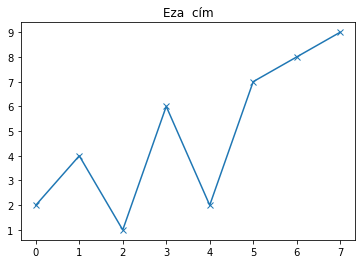

In [125]:
# kreáljunk egy adatsort és plt.plot() függvénnyel rajzoljuk ki
data = np.array([2,4,1,6,2,7,8,9] )
# data.size

plt.plot(data , "x-")
plt.title("Eza  cím")
plt.show()
